# Librerías:

In [ ]:
import numpy as np #Esta libreria sirve para trabajar con vectores y matrices.
import matplotlib.pyplot as plt #sublibrería para graficar
from scipy import signal #sublibrería para calcular convolución
from scipy.fftpack import fft,fftshift,ifft #funciones p/trabajar con la Transf. de Fourier
from scipy.io.wavfile import read, write  #para leer, grabar archivos de audio formato wav
import IPython.display as ipd #Para escuchar audios.
import pywt #Para trabajar con onditas.

# Trabajo con vectoress

Para definir un arreglo vectorial (un vector) uso **np.array**, donde yo defino mi lista de elemntos.



In [ ]:
v= np.array([1,4,8,16])
print(v) #Con esta funcion print, muestro por pantalla los resultados.

[ 1  4  8 16]


 Para generar un vector usamos **np.arange(inicio,límsup,paso)**, comienza en inicio, hasta límsup exclusive,
con saltos dados por paso

esta misma funcion puede utilizarse para discretizar el vector tiempo.


In [ ]:
w=np.arange(0,10,2) #de 0 a 9, a un paso de 2
print(w)

[0 2 4 6 8]


Otra forma de hacer esto mismo es utilizando la funcion:

 **np.linspace(inicio,limite superior inclusive,cantidad de muestras)**


In [ ]:
u=np.linspace(0,10,5) #Inicio en 0, hasta 10 con un paso tal que me den por resultado la cantidad de muestras indicadas.
print(u)

g=np.linspace(0,10,5,endpoint=False)
#Esta modificacion sirve para no llegar hasta el limite superior inclusive, entonces obtendria lo mismo que un arange.
print(g)

[ 0.   2.5  5.   7.5 10. ]
[0. 2. 4. 6. 8.]


Si quiero saber la longitud de un vector uso la funcion **len(vector)**

In [ ]:
len(v)

4

Valores **maximos y minimos** de un vector o variable!


*  **np.amax** para el Maximo
*   **np.amin** para el Minimo



In [ ]:
maxv=np.amax(v) #Valor maximo del vector V
minv=np.amin(v) #Valor minimo del vector v
print(maxv)
print(minv)

16
1


Desplazarme o moverme en el vector, siempre los indices comienzan en 0.


In [ ]:
d=v[2] #Asigno a una variable o tomo el valor que hay en la casilla 2 del vector, que seria el lugar 3 si cuento desde 1
print(v)
print(d)

[ 1  4  8 16]
8


Operaciones:


*   Suma: +
*   Resta: -
* Multipliacion: *
* Exponencial: **
* Division: /
* Calcular la mitad y sacar el resto: //2




# Graficaas

Para graficar vectores/funciones continuas utilizo **plt.plot**, une los puntos.


Para graficar vectores/funciones discretas utilizo **plt.stem**

Para concatenar señales, uso:

np.concatenate((x1,x2))

[0 2 4 6 8]


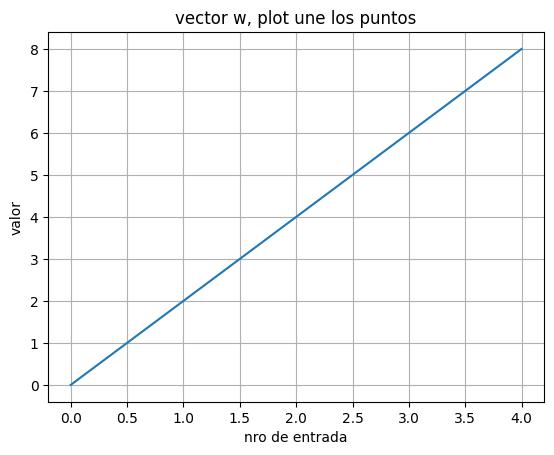

In [ ]:
plt.plot(w)
print(w)
plt.title('vector w, plot une los puntos')#Para ponerle titulo
plt.xlabel('nro de entrada') #Para poner titulo en los ejes
plt.ylabel('valor')
plt.legend(loc='upper right') #se define lugar de la leyenda en la figura
plt.grid(True) # poner grid en la grafica
plt.show()#Para que se vea bonito(?)
plt.tight_layout() # para que no se superpongan las graficas

[0 2 4 6 8]


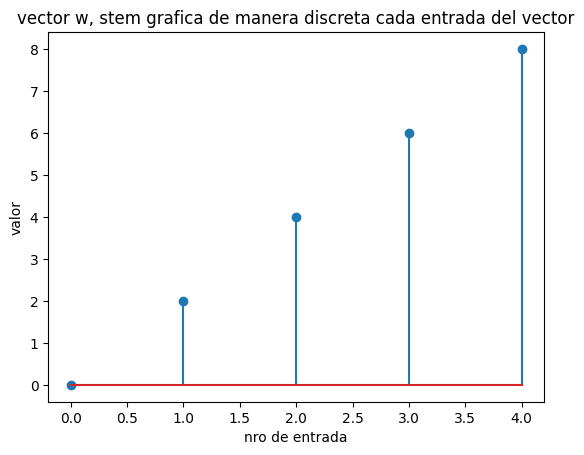

In [ ]:
plt.stem(w)
print(w)
plt.title('vector w, stem grafica de manera discreta cada entrada del vector')
plt.xlabel('nro de entrada')
plt.ylabel('valor')
plt.show()

Puedo hacer una matriz de graficos, es decir varios graficos uno al lado del otro o abajo, para compararlos!
uso:

**plt.subplot(nro de Filas,nro de Columnas,nro particular de alguna grafica)**

Ejemplo:


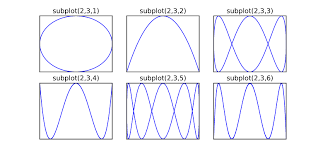

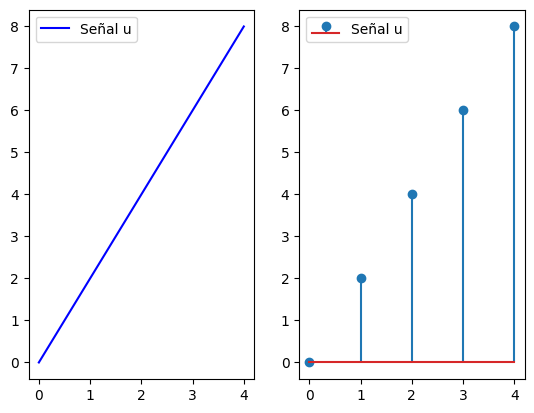

In [ ]:
plt.subplot(121)#1 fila, 2 columnas, grafica 1
plt.plot(w, color='blue', label='Señal u') #Puedo asignarle colores a las senales y titulos.
plt.legend()#ponerlo cada vez que quiero un titulo
plt.subplot(122)
plt.stem(w, label='Señal u')#No puedo ponerle colores :(
plt.legend()
plt.show()

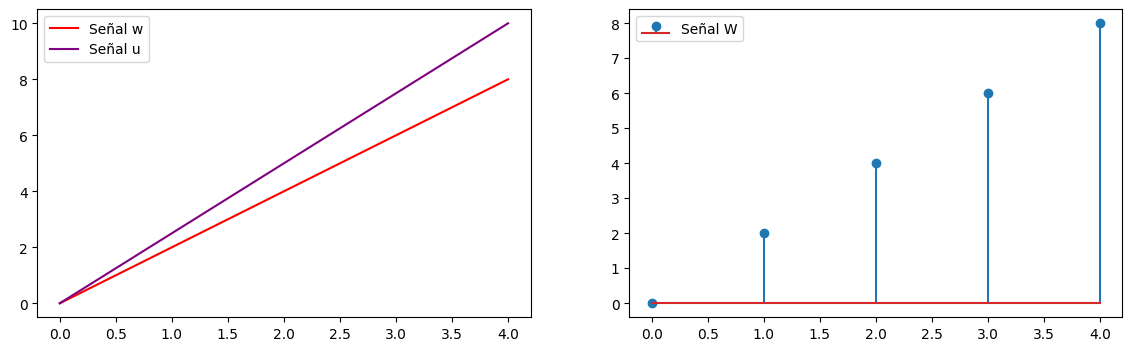

In [ ]:
plt.figure(figsize=(14,4))#Puedo modificar el tamano de las graficas
plt.subplot(121)
plt.plot(w, color='red', label='Señal w')
plt.plot(u, color='purple', label='Señal u')
plt.legend()
plt.subplot(122)
plt.stem(w, label='Señal W')
plt.legend()
plt.show()

# Digitalización de Señales



1) Dadas las señales periódicas $x$ y $z$ definidas para $t \in R $, tiempo medido en segundos

$$x(t)=sen(2\pi t)$$
$$z(t)=cos(14\pi t)$$

a) Se Calcula el período de cada una y su frecuencia.

b) Se Define la cantidad de Muestras, Periodo y Frecuencia de Muestreo, este Proceso seria **Muestrear** mi senal.

c) Defino mis senales con el vector de tiempo discretizado.

d) Graficar.



**a)** Período $P=L/k$, donde $L$ es la longitud del intervalo donde se cuentan la cantidad de oscilaciones (k),

y la Frecuencia $f= k/L= 1/P$

Para $x$:  El período es $P=L/k=1/1=1$ segundo, y la frecuencia 1 Hz.
    
Para $z$: El período es $P=L/k=1/7=0,14$ segundos, y la frecuencia es 7 Hz.

**b)**Voy a muestrear mi senal segun las indicaciones que me pidan, tantas cantidades de muestras, o tal periodo/frecuencia de muestreo.

Por ejemplo:



* Muestree

las señales $x$ e $z$, con $t \in [0,5)$, con $100$ muestras equiespaciadas por segundo. Calcule la cantidad de muestras necesaria, la frecuencia y período de muestreo.

Siempre uso la formula:

$L/PM=M$

O

$L*FM=M$

Donde:

* $L$ es la longitud el intervalo

*   $PM$ es el Periodo de Muestreo
*   $FM$ es la Frecuencia de Muestreo
*  $M$ es la cantidad de Muestras




In [ ]:
Pm=1/100
L=5 #Longitud el Intervalo
M=L/Pm #Cantidad de Muestras
Fm=M/L
print('la Frecuencia de muestreo es:',Fm,'Hz')
print('El periodo de muestreo es:',Pm,'s')
print('La cantidad de muestras es:',M)

la Frecuencia de muestreo es: 100.0 Hz
El periodo de muestreo es: 0.01 s
La cantidad de muestras es: 500.0


**c)** Defino el vector de tiempo discretizado con los datos anteriores y tambien ya puedo definir mis funciones o senales

In [ ]:
#Defino mis senales y mi vector de tiempo discretizado
t=np.arange(0,L,Pm) #Vector de tiempo
x=np.sin(2*np.pi*t)
z=np.cos(14*np.pi*t)


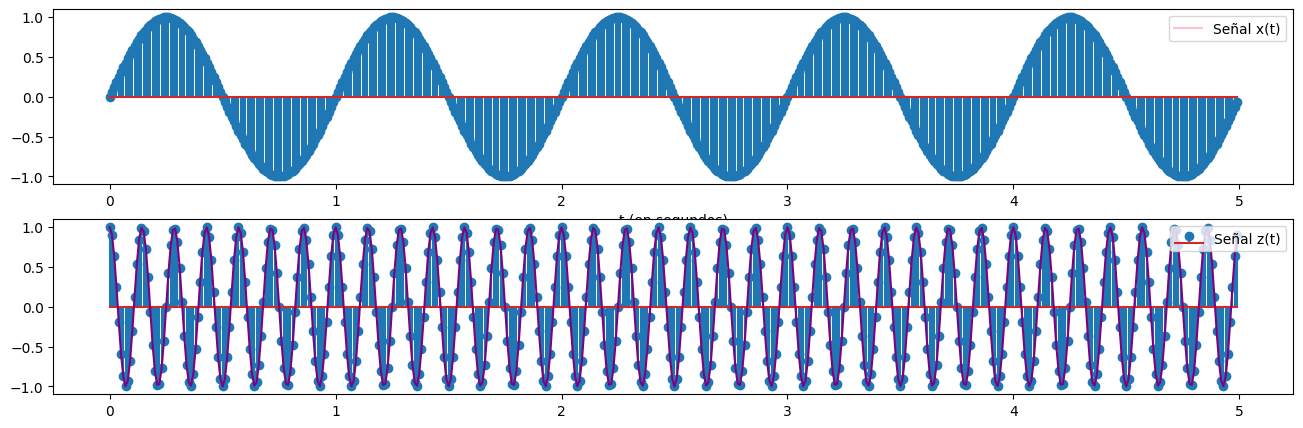

In [ ]:
#Grafico las senales
plt.figure(figsize=(16,5))
plt.subplot(211)
plt.plot(t,x, color='pink', label='Señal x(t)')
plt.stem(t,x)
plt.legend(loc='upper right')
plt.xlabel('t (en segundos)')

plt.subplot(212)
plt.stem(t,z,label='Señal z(t)')
plt.plot(t,z,color='purple')
plt.legend(loc="upper right")
plt.show()

# Convolucionn

Para calcular la convolucion lineal entre dos senales se utiliza la funcion:

**signal.convolve(senal1,senal1)**

Recordar que al hacer la convolucion, la longitud del tiempo con el mismo periodo, es casi el doble del de cada senal.

In [ ]:
#Ejemplo
y=signal.convolve(x,z)
len(y)#Cantidad de muestras de la convolucion
Ly=len(y)/Fm #Nueva longitud de la convolucion
print('La cantidad de muestras de la convolucion es:',len(y))
print('La nueva longitud del intervalo es:',Ly)

La cantidad de muestras de la convolucion es: 999
La nueva longitud del intervalo es: 9.99


Para calcular la **convolucion lineal** voy a usar una funcion que la profe ha definido, debo copiarla toda:



In [ ]:
#Convolución circular de N puntos de las señales f y g
#de forma "manual",  definiendo la funcion:
import numpy as np

def conv_circ_N(f,g, N):
  N=int(N)
  f1=np.zeros(N)
  g1=np.zeros(N)
  h=np.zeros(N)
  Mf=len(f)
  if Mf<= N: f1[0:Mf]=f
  else:   f1=f[0:N]
  Mg=len(g)
  if Mg<= N: g1[0:Mg]=g
  else:   g1=g[0:N]
  for m in range(N):
    for n in range(N):
      h[m] += f1[n]*g1[m - n]   # sumatoria
  return h

Luego voy a usar:

**conv_circ_N(senal1,senal2,punto N)**

Recordando que para que la convolucion lineal y la circular coincidan el N que elija debe cumplir lo siguiente:

$N \geq Lx + Ly -1$

Donde $Lx$ es la longitud de alguna senal $x$

y $Ly$ es la longitud de alguna otra senal $y$



In [ ]:
N=len(x)+len(z)-1
print(N)
yc=conv_circ_N(x,z,N)


999


# DFT.N yess

uso la funcion:

**fft(senal, cantidad de muestras N)**


calcula la transformada rapida de fourier y me lo guarda en un vector de N lugares!

In [ ]:
Tfx=fft(x,500) #DFT.N de la senal X con N=M=500 muestras


### Frec en Hertz y Nyquist

Pasaremos la frecuencias fundamentales de la DFT a Hertz:
usaremos regla de 3 simple para que sea más simple... ✊ 💯
Consideramos la DFT.N (descomposición en base $s_k$, con k=0,...,N-1)


k --------> N (muestras) , k oscilaciones en N muestras

fr <------- FrM (FrM muestras=1seg), fr= oscilaciones en 1 segundo  (es la frecuencia en Hertz)

luego fr= k*FrM/N es la frecuencia en Hertz, p/k=0,,,,N o centrada, siendo Fr/2 la de Nyquist (para k=N/2)  




In [ ]:
N=500 # si se usa la transformada punto N=500
k=np.arange(N)
kc=np.arange(-N//2,N//2) #Si N es impar, le saca el resto la //
Fm=100 # si la frecuencia de muestreo es 100 Hrtz
fr_Hz=k*Fm/N # en Hz de 0 a Fr1, en [0,Fr1)
fr_Hz_centrada=kc*Fm/N # en Hz de [-Fr1/2,Fr1/2), con N muestras, Fr1/2=frec de Nyquist
#print(k)

Hay una funcion que permite al igual que el vector de tiempos discretizados, hacer un vector de frecuencias discretizadas.

**np.fft.fftfreq(n, d=1.0)**
* Parámetros :


* **n:** Longitud de la ventana, cantidad de muestras

* **d :** Espaciado de muestreo (inverso de la tasa de muestreo). El valor predeterminado es 1.

In [ ]:
senal= np.array([-2, 8, 6, 4, 1, 0, 3, 5])
fourier=fft(senal)
n =len(senal)
PeriododeMuestreo=0.1
vec_frec=np.fft.fftfreq(n,PeriododeMuestreo)
print(vec_frec)


[ 0.    1.25  2.5   3.75 -5.   -3.75 -2.5  -1.25]


Al graficar no olvidarme que la DFT.N me da resultados en los reales y los complejos
para graficar la parte real de la TF uso **np.real(Tf)** y para la parte imaginaria **np.imag(Tf)**
o si quiero el valor absoluto de la TF uso **abs(Tf)**

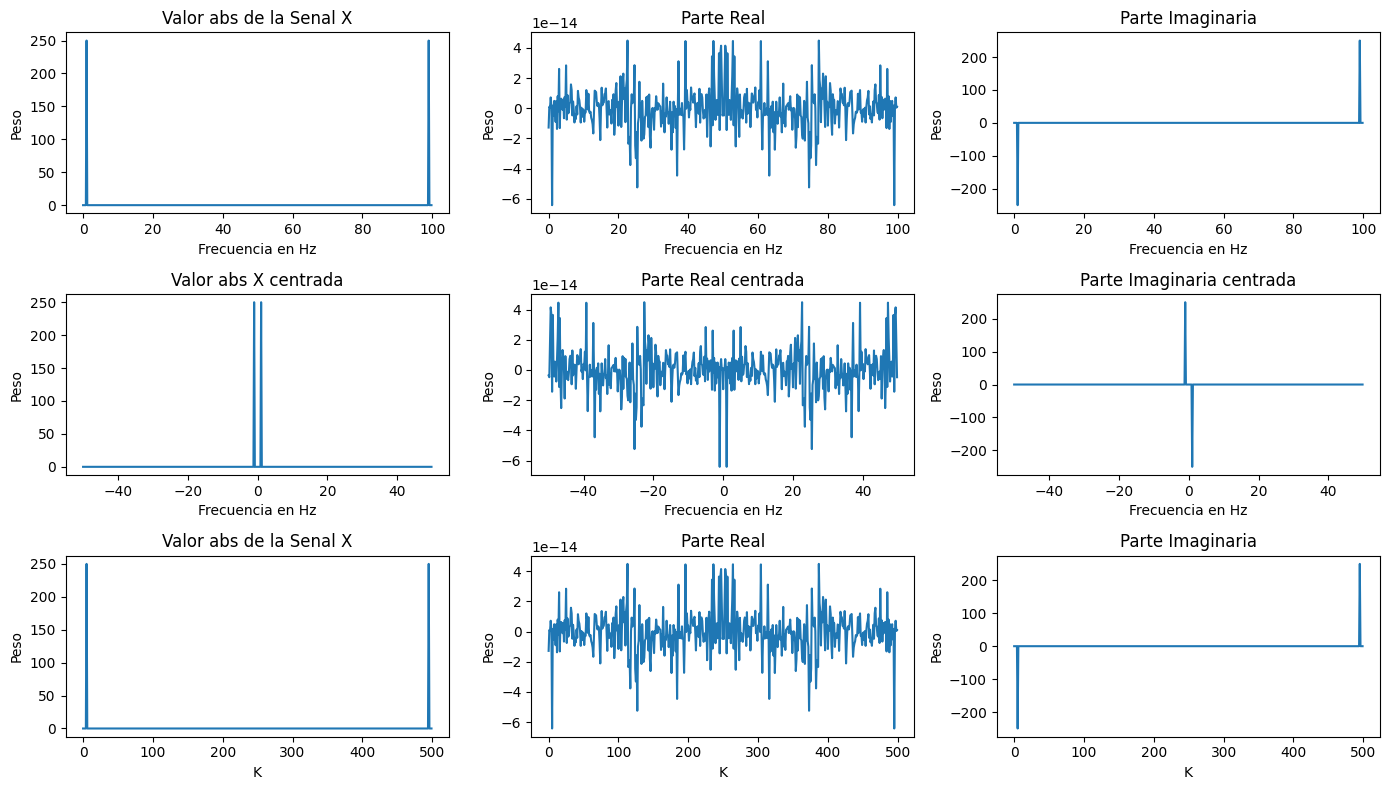

In [ ]:
#Puedo graficar la DFT.N de la senal
plt.figure(figsize=(14,8))
plt.subplot(331)
plt.plot(fr_Hz,abs(Tfx))
plt.title('Valor abs de la Senal X')
plt.xlabel('Frecuencia en Hz')
plt.ylabel('Peso')
plt.subplot(334)
plt.plot(fr_Hz_centrada,fftshift(abs(Tfx)))
plt.title('Valor abs X centrada')
plt.xlabel('Frecuencia en Hz')
plt.ylabel('Peso')
plt.subplot(337)
plt.plot(k,abs(Tfx))
plt.title('Valor abs de la Senal X')
plt.xlabel('K')
plt.ylabel('Peso')
plt.subplot(332)
plt.plot(fr_Hz,np.real(Tfx))
plt.title('Parte Real')
plt.xlabel('Frecuencia en Hz')
plt.ylabel('Peso')
plt.subplot(335)
plt.plot(fr_Hz_centrada,fftshift(np.real(Tfx)))
plt.title('Parte Real centrada')
plt.xlabel('Frecuencia en Hz')
plt.ylabel('Peso')
plt.subplot(338)
plt.plot(k,np.real(Tfx))
plt.title('Parte Real')
plt.xlabel('K')
plt.ylabel('Peso')
plt.subplot(333)
plt.plot(fr_Hz,np.imag(Tfx))
plt.title('Parte Imaginaria')
plt.xlabel('Frecuencia en Hz')
plt.ylabel('Peso')
plt.subplot(336)
plt.plot(fr_Hz_centrada,fftshift(np.imag(Tfx)))
plt.title('Parte Imaginaria centrada')
plt.xlabel('Frecuencia en Hz')
plt.ylabel('Peso')
plt.subplot(339)
plt.plot(k,np.imag(Tfx))
plt.title('Parte Imaginaria')
plt.xlabel('K')
plt.ylabel('Peso')
plt.tight_layout() # para que no se superpongan las graficas
plt.show()

# Matricess bb


In [ ]:
#Definimos una matriz (array 2D, con filas y columnas)
mat = np.array(([1,2,3],[4,5,6],[7,8,9],[10,11,12]))
print(mat)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [ ]:
matriz_ceros = np.zeros((3,2))
print(matriz_ceros)

matriz_unos = np.ones((2,4))
print(matriz_unos)

[[0. 0.]
 [0. 0.]
 [0. 0.]]
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]]


forma, tamaño, shape

In [ ]:
#tamaños, dimensiones, forma, shape
#array 2D, con filas y columnas
print(mat.shape, '=(#filas, #cols), shape de matriz 4x3')
print(matriz_ceros.shape,'shape de matriz 3x2')
print(matriz_unos.shape,'shape de matriz 2x4')

(4, 3) =(#filas, #cols), shape de matriz 4x3
(3, 2) shape de matriz 3x2
(2, 4) shape de matriz 2x4


In [ ]:
#accedemos a las entradas de la matriz (arreglo 2D)
#con dos índices, uno para filas y otro para columnas
#el primer índice es el de la fila y los índices comienzan en 0
print(mat) #matriz completa
print(mat[2,1]) #3era fila 2da columna,

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
8


elegimos filas y columnas

In [ ]:
print(mat)
print(mat[2,:]) #tercera fila, o fila número 2, los índices empiezan en 0
ter_fila=mat[2,:]

segcol=mat[:,1]
print(segcol)
segcolmat=mat[:,1:2]

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[7 8 9]
[ 2  5  8 11]



mostrar el tamaño (dimensiones) de la matriz y la tercera fila  (ayuda: .shape)

In [ ]:
print(mat.shape)
print(ter_fila.shape)
print(segcol.shape)
print(segcolmat.shape)

(4, 3)
(3,)
(4,)
(4, 1)


compararlo con la función len

In [ ]:
print(len(ter_fila))
print(ter_fila.shape)

3
(3,)


In [ ]:
print(mat) #
print(mat[:,0]) #primera columna
print(mat[:,0].shape)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 4 7]
(3,)


# Y los audiosss cariniio??

## Archivos en Colab:
clik en el lugar indicado con rojo en próxima imagen y luego buscan y seleccionan los archivos necesarios


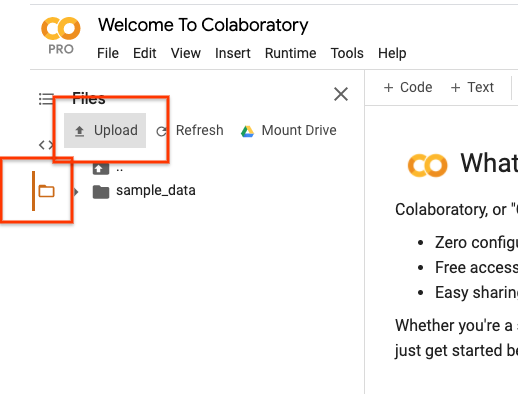

como leer audio.wav??

a) Lleve a memoria la señal que se encuentra en el archivo

b) con la funcion read('mi audio cnoraa')


In [ ]:
# no se olvide de tener el archivo en la nube del colab siguiendo las instrucciones de arriba
au1=read('audiolab1.wav')
print (au1) #dupla

(44100, array([[  1,   1],
       [  1,   1],
       [  1,   1],
       ...,
       [  3,   3],
       [ -8,  -8],
       [-13, -13]], dtype=int16))


Notar que al abrir el archivo nos encontramos con una dupla de datos.
- En el primer lugar (au1[0]), nos encontramos con la frecuencia de muestreo en Hertz con que fue capturada la señal de audio
- En segundo lugar (au1[1]) con la señal en si, que según el aparato con que fue capturada la señal puede ser un vector (array 1D) o una matriz con dos columnas (sonido stereo, en general dos columnas iguales)

In [ ]:
Fr1=au1[0] #frecuencia de muestreo (en Hertz) que tuvo la señal
print(Fr1)

44100


In [ ]:
au1[1] #señal de audio
#Luego para trabajar con esta senal elijo solo una columna de datos

array([[  1,   1],
       [  1,   1],
       [  1,   1],
       ...,
       [  3,   3],
       [ -8,  -8],
       [-13, -13]], dtype=int16)

In [ ]:
print(au1[1].shape) #matriz de datos (vector en algunos aparatos)

(344053, 2)


c) Cuál fue la frecuencia de muestreo. Cual es la frecuencia de Nyquist del muestreo. Comente

La frecuencia de muestreo fue de 44100Hz

El periodo de muestreo es de (1/44100)s

La frecuencia de Nyquist es la mitad de la frecuencia de muestreo: 2050Hz
ya que la Señal ya estaba muestreada.


# Por una ventanitaaa



Considere las ventanas rectangular, Barlett, Hamming, Parzen y Blackman  con longitudes L = 33 y 99.


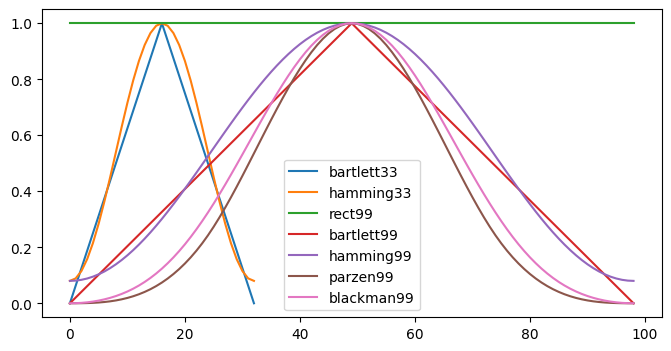

In [ ]:
w1 = np.ones(33) #rectangular
w2 = signal.bartlett(33)
w3=  signal.hamming(33)
w4 = signal.parzen(33)
w5 = signal.blackman(33)

w1g = np.ones(99) #rectangular
w2g = signal.bartlett(99)
w3g = signal.hamming(99)
w4g = signal.parzen(99)
w5g = signal.blackman(99)

m = np.arange(33) #para el eje de las abscisas, vector con nros de muestras
mg = np.arange(99) #para el eje de las abscisas, vector con nros de muestras

plt.figure(figsize=(8, 4))
plt.plot(m,w2, m,w3)
plt.plot(mg,w1g,mg,w2g, mg,w3g, mg,w4g,mg, w5g)
plt.legend(('bartlett33','hamming33','rect99','bartlett99','hamming99','parzen99', 'blackman99'))
plt.show()

In [ ]:
#Calculamos la transformada de Fourier punto N de cada ventana de long 33, y luego solo las centramos
#para ubicar los resultados de las frecuencias bajas en el centro
N=512
W1=fft(w1,N) # transformada, señal compleja
W2=fft(w2,N)
W3=fft(w3,N)
W4=fft(w4,N)
W5=fft(w5,N)

W1c=fftshift(W1) #fftshift solo centra,
W2c=fftshift(W2)
W3c=fftshift(W3)
W4c=fftshift(W4)
W5c=fftshift(W5)

In [ ]:
#Calculamos la transformada de Fourier punto N de cada ventana de long 99, y luego solo las centramos
N=512
W1g=fft(w1g,N) # transformada, señal compleja
W2g=fft(w2g,N)
W3g=fft(w3g,N)
W4g=fft(w4g,N)
W5g=fft(w5g,N)

W1gc=fftshift(W1g) #fftshift solo centra,
W2gc=fftshift(W2g)
W3gc=fftshift(W3g)
W4gc=fftshift(W4g)
W5gc=fftshift(W5g)

In [ ]:
#Vectores de frecuencias, para
k=np.arange(0,N) #frec fundamentales de la DFT, de 0 a N-1, en [0,N), #k ocilaciones en N muestras, con k de 0 a N-1
kc=np.arange(-N/2,N/2) # ahora centrada, para cuando se usa fftshift para la transformada

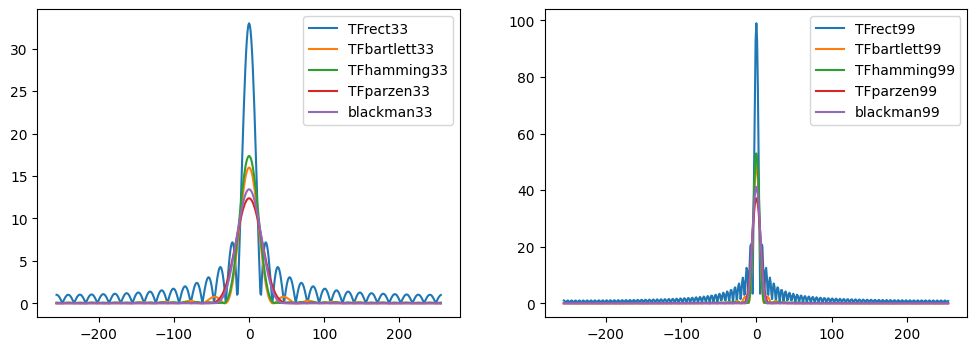

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(kc,abs(W1c),kc,abs(W2c),kc,abs(W3c),kc,abs(W4c),kc,abs(W5c))
plt.legend(('TFrect33','TFbartlett33','TFhamming33','TFparzen33', 'blackman33'))
plt.subplot(122)
plt.plot(kc,abs(W1gc),kc,abs(W2gc),kc,abs(W3gc),kc,abs(W4gc),kc,abs(W5gc))
plt.legend(('TFrect99','TFbartlett99','TFhamming99','TFparzen99', 'blackman99'))
#completar con longitud 99
plt.show()

b) Compare resultados de la misma ventana para las dos longitudes. Incluya los dos resultados en el mismo gráfico. Qué comentarios puede hacer?

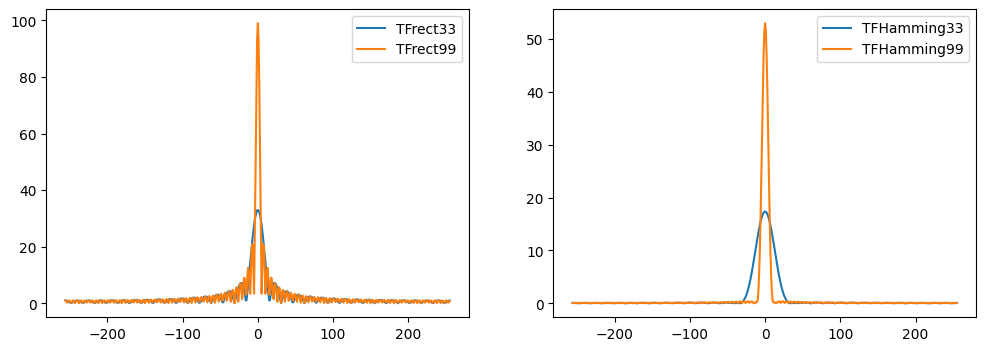

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(kc,abs(W1c),kc,abs(W1gc))
plt.legend(('TFrect33','TFrect99'))
plt.subplot(122)
#completar con transf de ventanas Hamming
plt.plot(kc,abs(W3c),kc,abs(W3gc))
plt.legend(('TFHamming33','TFHamming99'))
plt.show()

Para ventanas de mayor longitud en tiempo puedo tener mayor precision en frecuencia ya que la forma de la transformada se aproxima mucho al impulso unitario. Caso contrario de tener una ventana temporal mas pequeña, con menor cantidad de muestras, la TF se hace más amplia y lobulada, perdiendo resolución.
La ventana rectangular en tiempo es ideal, pero es en frecuencia genera derrames por los lóbulos, las demas ventanas buscan compensar esto.

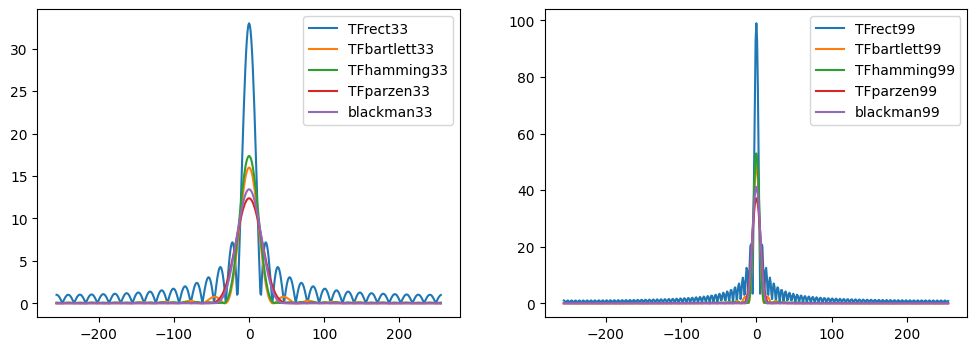

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(kc,abs(W1c),kc,abs(W2c),kc,abs(W3c),kc,abs(W4c),kc,abs(W5c))
plt.legend(('TFrect33','TFbartlett33','TFhamming33','TFparzen33', 'blackman33'))
plt.subplot(122)
plt.plot(kc,abs(W1gc),kc,abs(W2gc),kc,abs(W3gc),kc,abs(W4gc),kc,abs(W5gc))
plt.legend(('TFrect99','TFbartlett99','TFhamming99','TFparzen99', 'blackman99'))
#completar con longitud 99
plt.show()

### ancho de banda a 3 dB
Para calular el ancho de banda de una ventana tengo que tomar la caida a 3dB de la TF de la ventana.

In [ ]:
#Primero calculamos el módulo en dB de cada ventana.
W1dB=20*np.log10(1+abs(W1c))
W2dB=20*np.log10(1+abs(W2c))
W3dB=20*np.log10(1+abs(W3c))
W4dB=20*np.log10(1+abs(W4c))
W5dB=20*np.log10(1+abs(W5c))

W1gdB=20*np.log10(1+abs(W1gc))
W2gdB=20*np.log10(1+abs(W2gc))
W3gdB=20*np.log10(1+abs(W3gc))
W4gdB=20*np.log10(1+abs(W4gc))
W5gdB=20*np.log10(1+abs(W5gc))

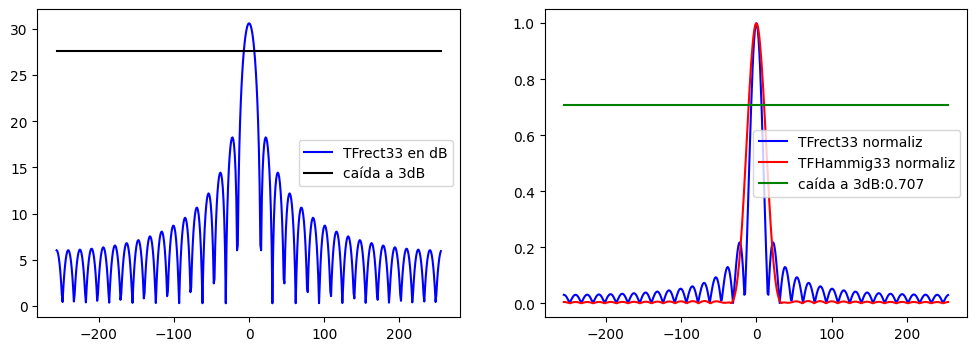

máx en dB de TFrect33: 30.629578340845104
máx en dB de rect-3dB: 27.629578340845104


In [ ]:
#caida en dB gráficamente para  la ventana rectangular long 33:
m3dBr=(np.max(W1dB)-3)*np.ones(512)
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(kc,W1dB,'b',kc,m3dBr,'black')
plt.legend(('TFrect33 en dB','caída a 3dB'))

W1N=abs(W1c/np.max(W1c)) #transformada(centrada)de rect, ahora normalizada,
W3N=abs(W3c/np.max(W3c)) #transformada(centrada) de Hamming, ahora normalizada,
#el máximo pasa a ser 1 y la caida a 3 decibeles a 0,707, para ambos
m3dBn=(0.707)*np.ones(512)
plt.subplot(122)
plt.plot(kc,W1N,'b',kc,W3N,'r', kc,m3dBn,'g')
plt.legend(('TFrect33 normaliz','TFHammig33 normaliz','caída a 3dB:0.707'))


plt.show()
print('máx en dB de TFrect33:', np.max(W1dB))
print('máx en dB de rect-3dB:', np.max(W1dB)-3)

Para todas las normalizadas:
El máximo pasa a ser 1 y la caida a 3 decibeles a 0,707 (para todas)

13 es la cant de muestras donde supera la caida a 3dB la rect
21 es la cant de muestras donde supera la caida a 3dB la Hamming


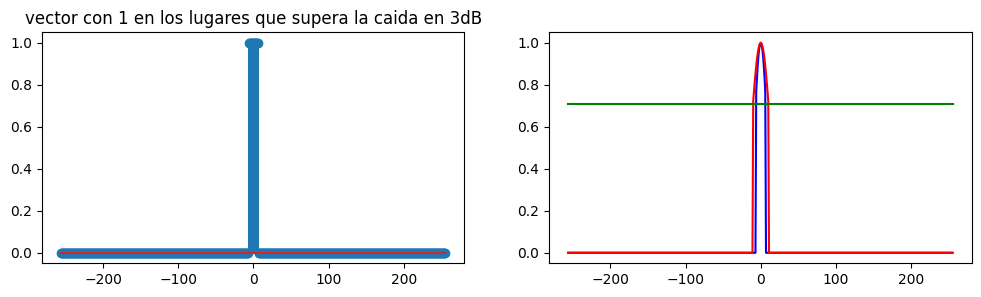

In [ ]:
#Cálculo
#1ero se normaliza las transformadas (sin pasar a decibeles)
#Ventana rectangular: W1N=abs(W1c/np.max(W1c)) #transformada(centrada), ahora normalizada,
#el máximo pasa a ser 1 y la caida a 3 decibeles a 0,707
lugares1= (W1N>0.707) #vector, vale 1 donde se cumple la desig y 0 en el resto
print(sum(W1N>0.707), 'es la cant de muestras donde supera la caida a 3dB la rect')
lugares3= (W3N>0.707) #vector, vale 1 donde se cumple la desig y 0 en el resto
print(sum(W3N>0.707), 'es la cant de muestras donde supera la caida a 3dB la Hamming')

plt.figure(figsize=(12, 3))
plt.subplot(121)
plt.stem(kc,lugares1)
plt.title('vector con 1 en los lugares que supera la caida en 3dB')

plt.subplot(122)
plt.plot(kc,lugares1*W1N,'b',kc,lugares3*W3N,'r',kc,m3dBn,'g')
plt.show()

In [ ]:
deltaf1=sum(W1N>0.707)/N #ancho de banda en frec: Delta de f para rectangular 33
#deltaw1=deltaf1*2*np.pi #ancho de banda Delta de omega

deltaf3=sum(W3N>0.707)/N #ancho de banda en frec: Delta de f para Hamming 33
#deltaw3=deltaf3*2*np.pi #ancho de banda Delta de omega

print('ancho de banda de rectangular 33 es',deltaf1 )
print('ancho de banda de Hamming 33 es',deltaf3 )

ancho de banda de rectangular 33 es 0.025390625
ancho de banda de Hamming 33 es 0.041015625


Si analizamos una señal discretizada con frecuencia de muestreo Fm (por seg)

Delta de f se multiplica por Fm y ese sería el ancho de banda del análisis de esa señal utilizando DFT.N y la ventana elegida


### altura máx de lóbulos laterales
para cada una Determine la altura máxima de los lóbulos laterales. Esto está relacionado con el Efecto derrame
Compare los resultados para los distintos tipos de ventana y sus distintas longitudes.

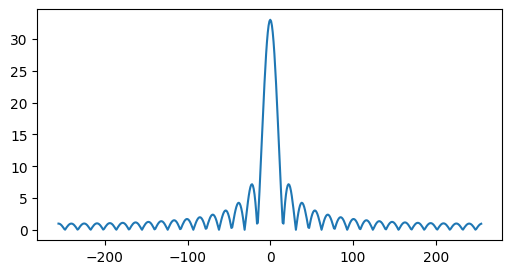

In [ ]:
plt.figure(figsize=(6, 3))
plt.plot(kc,abs(W1c))#Trasnformada de Rectangular 33, centrada
plt.show()

In [ ]:
picosw1=signal.find_peaks(abs(W1c))#Con esta funcion selecciono los lugares de los picos de la ventana y me los guarda en la primera columna de la matriz
print(picosw1)

(array([ 16,  31,  47,  62,  78,  93, 109, 124, 140, 155, 171, 187, 202,
       218, 234, 256, 278, 294, 310, 325, 341, 357, 372, 388, 403, 419,
       434, 450, 465, 481, 496]), {})


In [ ]:
lugares_picosw1 = picosw1[0]
altura_de_los_picos=abs(W1c[lugares_picosw1])
print(altura_de_los_picos)

[ 1.          1.01834824  1.03866048  1.07691777  1.12242918  1.18807518
  1.27055244  1.3803284   1.52684005  1.7209115   2.00254448  2.40069245
  3.0682033   4.27295725  7.18510462 33.          7.18510462  4.27295725
  3.0682033   2.40069245  2.00254448  1.7209115   1.52684005  1.3803284
  1.27055244  1.18807518  1.12242918  1.07691777  1.03866048  1.01834824
  1.        ]


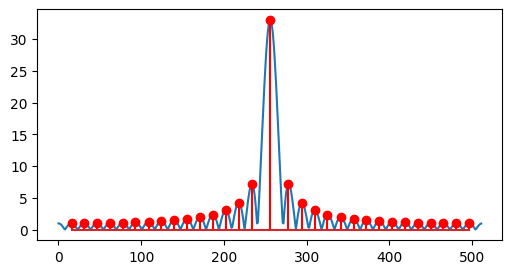

In [ ]:
plt.figure(figsize=(6, 3))
plt.plot(abs(W1c))#Transformada de Rectangular 33
plt.stem(lugares_picosw1,altura_de_los_picos, 'r')
plt.show()

In [ ]:
#sort ordena de manera ascendente
picordw1= np.sort(abs(W1c[lugares_picosw1])) #alturas ordenadas
print(picordw1)

[ 1.          1.          1.01834824  1.01834824  1.03866048  1.03866048
  1.07691777  1.07691777  1.12242918  1.12242918  1.18807518  1.18807518
  1.27055244  1.27055244  1.3803284   1.3803284   1.52684005  1.52684005
  1.7209115   1.7209115   2.00254448  2.00254448  2.40069245  2.40069245
  3.0682033   3.0682033   4.27295725  4.27295725  7.18510462  7.18510462
 33.        ]


In [ ]:
#como queremos la altura máxima de los picos laterales
AMLLrect33=picordw1[-2] #Tomo el penultimo ya que el ultimo es el más grande y a mi solo me interesa el mayor de los laterales
print(AMLLrect33)

7.185104624364864


##**Transformada de Fourier a tiempo corto de una señal** ⛱

**$STFT(x,h,t,w)=DFT(x.h_t)(w)$**


**p/c t**(tiempo): es la Transf de Fourier de x por la ventana centrada en t

**Señal compleja que depende de la frecuencia w**

El Espectrograma de una señal es el módulo al cuadrado de la STFT (ver pág 121 apunte), también función de t y w:

**$Espectrograma_x(t,w)=|STFT(x,t,w)|^2=|DFT(x.h_t)(w)|^2$**

### **En el lab Discreta**

En el lab usaremos DFT.N,
que está en función de las frecuencias fundamentales $k = 0, ..., N-1 $ (que pasaremos a frecuencia en Hertz)

**$STFT(x,h,t,k)=DFT(x.h_t)(k)$**

**$Espectrograma_x(t,k)=|STFT(x,t,k)|^2=|DFT(x.h_t)(w)|^2$**

# Espectogramas dicee

Utilizo la funcion:

 **f , t, sxx = signal.spectrogram(x, fs, window=(),noverlap=None, nfft=N)**

Parámetros :

**x:** Mi senal

**fs:** Frecuencia de muestreo de la serie temporal x . El valor predeterminado es 1.0.

**window:** Ventana deseada para usar.


**noverlap:** Número de puntos a superponer entre segmentos.(solapado)

**nfft:** Longitud de la FFT utilizada, si se desea una FFT con relleno de ceros. Si es Ninguno , la longitud de la FFT es nperseg . El valor predeterminado es Ninguno .

Devoluciones :

**f :** Matriz de frecuencias de muestra.

**t :** Matriz de tiempos de segmento.

**sxx ​​:** Espectrograma de x. Por defecto, el último eje de Sxx corresponde a los tiempos del segmento.


Para graficar utilizo:

**plt.pcolormesh(t, f, Sxx1)**

**plt.xlabel('tiempo')**

**plt.ylabel('frec en Hertz')**

**plt.colorbar()# la altura de z se representa con un color->mapa de color/calor**

 Ejemplito con Chirp Lineal

**señal NO estacionaria** Chirp Lineal: Señal oscilante con frec de oscilación creciente de manera lineal


tiempo en [0,2) muestreado con 3000 muestras:


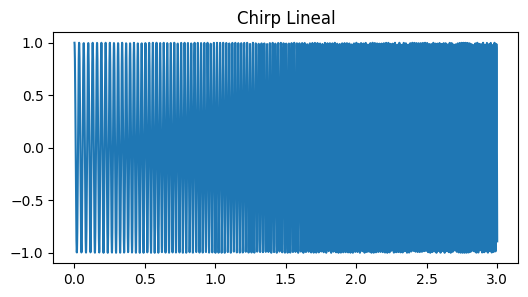

In [ ]:
t = np.arange(0,3, 0.001) #tiempo con 1000 Hz frec de muestreo (Período 0.001s)
print('tiempo en [0,2) muestreado con', len(t),'muestras:')
C1=signal.chirp(t,30,2,60) #frec inicial 30Hz y 60Hz al segundo
plt.figure(figsize=(6, 3))
plt.plot(t,C1)
plt.title('Chirp Lineal')
plt.show()

In [ ]:
N=3000
k=np.arange(N)
kc=np.arange(-N//2,N//2) #Si N es impar, le saca el resto la //
Fm=1000
#fr_Hz=k*Fm/N # en Hz de 0 a Fr1, en [0,Fr1)
fr_Hz_centrada=kc*Fm/N # en Hz de [-Fr1/2,Fr1/2), con N muestras, Fr1/2=frec de Nyquist
fr_Hz=np.arange(0,N/2)*Fm/N #en Hz [0,Fr1/2), N/2 muestras

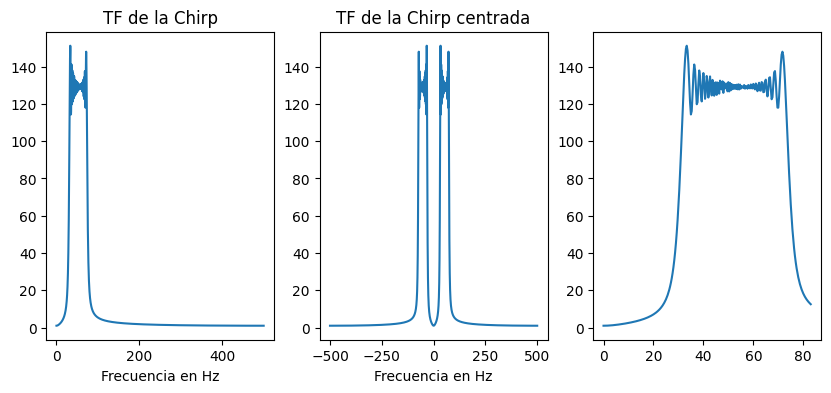

In [ ]:
Tc1=fft(C1,N)
plt.figure(figsize=(10,4))
plt.subplot(131)
plt.plot(fr_Hz,abs(Tc1[0:N//2]))
plt.title('TF de la Chirp')
plt.xlabel('Frecuencia en Hz')
plt.subplot(132)
plt.plot(fr_Hz_centrada,fftshift(abs(Tc1)))
plt.title('TF de la Chirp centrada')
plt.xlabel('Frecuencia en Hz')
plt.subplot(133)
plt.plot(fr_Hz[0:250],abs(Tc1[0:250]))
plt.show()

In [ ]:
h33=signal.hamming(100)
h501=signal.hamming(501)
r501=np.ones(200)
f1, t1, Sxx1 = signal.spectrogram(C1,fs=Fm, window=h33,nfft=N, noverlap=None) #espectograma sin solape
f2, t2, Sxx2 = signal.spectrogram(C1,fs=Fm, window=h501, nfft=N, noverlap=None) # espectrograma sin solape
f3, t3, Sxx3 = signal.spectrogram(C1,fs=Fm,window=r501,noverlap=None,nfft=N)

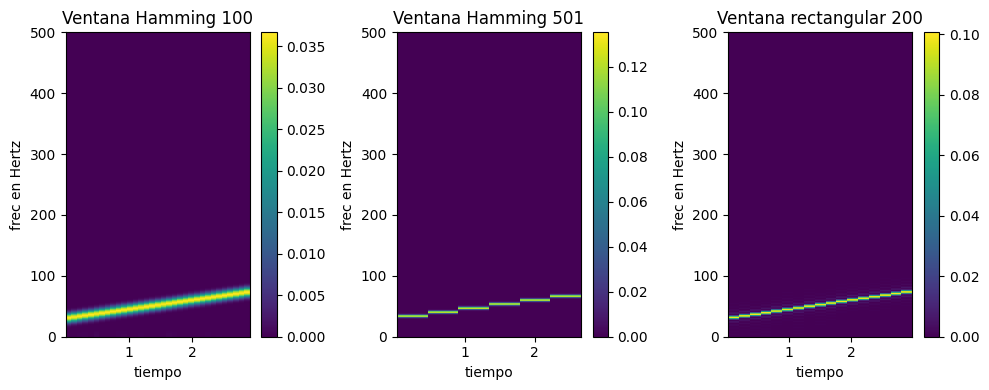

In [ ]:
plt.figure(figsize=(10,4))
plt.subplot(131)

plt.pcolormesh(t1, f1, Sxx1)
plt.title('Ventana Hamming 100')
plt.xlabel('tiempo')

plt.ylabel('frec en Hertz')

plt.colorbar()# la altura de z se representa con un color->mapa de color/calor
plt.subplot(132)
plt.pcolormesh(t2, f2, Sxx2)
plt.title('Ventana Hamming 501')
plt.xlabel('tiempo')

plt.ylabel('frec en Hertz')

plt.colorbar()
plt.subplot(133)
plt.pcolormesh(t3, f3, Sxx3)
plt.title('Ventana rectangular 200')
plt.xlabel('tiempo')

plt.ylabel('frec en Hertz')

plt.colorbar()
plt.tight_layout() # para que no se superpongan las graficas
